# Description:
In this notebook, we are going to predict whether a person's income is above or below $50k yearly using various features like age, education, and occupation.

The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32,561 rows and 13 features.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Motivation:
Building such predictive models can help us better understand the population of a country as well as the various factors affecting the economy. Governments can understand such factors and improve upon them leading to the growth of the country.

# Features Description

In [1]:
import pandas as pd
df1=pd.read_csv(r"D:\ARUN DATA\DATA SCIENCE PRACTISE\Machine Learning\Project\Feature Description of project.csv")
df1

,Column ID,Column Name,Description
0,1,age,Age of person
1,2,workclass,Workclass of person
2,3,fnlwgt,Final weight
3,4,education,Education Degree of person
4,5,education.num,Number of years of education
5,6,marital.status,Marital status of person
6,7,occupation,Occupation of person
7,8,sex,Sex of person
8,9,capital.gain,Capital gain of person
9,10,capital.loss,Capital loss of person


# Step 0: Load libraries and dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Step 1:Importing Dataset

In [3]:
df=pd.read_csv(r"D:\ARUN DATA\DATA SCIENCE PRACTISE\Machine Learning\Project\adult (1).csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


# Step 2: Exploratory Data Analysis

In [4]:
df.head()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [5]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Observations:
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

In [9]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [11]:
df["workclass"].replace("?","Private",inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,?,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,?,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [12]:
df["occupation"].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [13]:
NL_mode=df["occupation"].mode()
NL_mode

0    Prof-specialty
Name: occupation, dtype: object

In [14]:
df["occupation"].replace("?","Prof-specialty",inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [15]:
df["native.country"].mode()

0    United-States
Name: native.country, dtype: object

In [16]:
df["native.country"].replace("?","United-States",inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [17]:
df["occupation"].head()

0       Prof-specialty
1      Exec-managerial
2       Prof-specialty
3    Machine-op-inspct
4       Prof-specialty
Name: occupation, dtype: object

In [18]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Female,0,3900,40,United-States,<=50K


# Step 2.1:Visualization

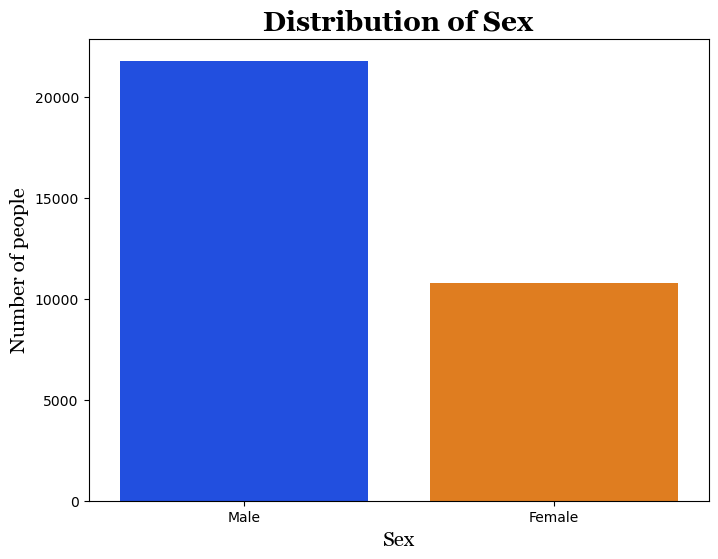

In [19]:
sex = df['sex'].value_counts()
plt.style.use('default')
plt.figure(figsize=(8, 6))
sns.barplot(x=sex.index, y=sex.values, palette='bright')
plt.title('Distribution of Sex', fontdict={'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# Observation:-
The bar graph provide the distribution of the 'sex' variable in the dataset, showcasing the proportion of males and females. Based on the graph, the following observations can be made.
The graph reveals a noticeable disparity between the number of males and females in the dataset.The proportion of males is observed to be greater than that of females.

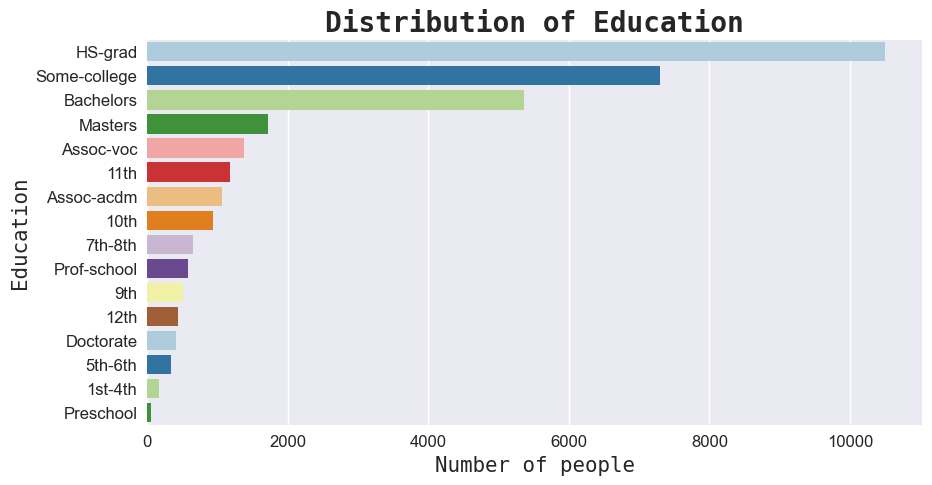

In [20]:
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# Observation:-
The above bar graph shows the distribution of Education where X-Axis labelled as "Number of people" and Y-Axis labelled as "Education".Based on the graph, the following observations can be made that hightest number of people are HS Graduate, further it follows as Bachelors & Masters,Lowest number of people are preschool passouts.

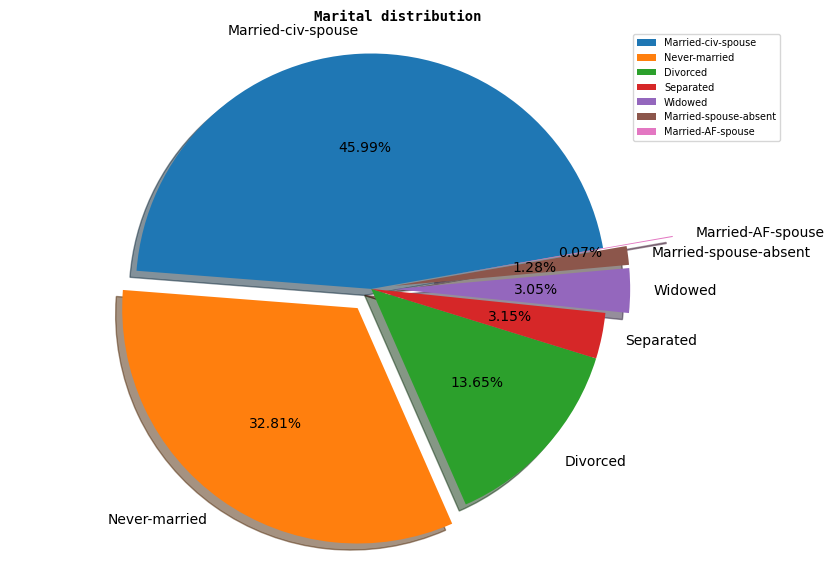

In [21]:
marital = df['marital.status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(0, 0.10, 0, 0, 0.10, 0.10, 0.30), shadow=True, autopct='%1.2f%%')
plt.title('Marital distribution', fontdict={'fontname': 'Monospace', 'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

# Observation:-
The above pie chart provides a visual representation of the distribution of marital status in the dataset.Based on the Charts, the following observations can be made that the percentage of married people is highest 45.99%,followed by Never Married 32.81%, and lowest is for Married-AF-Spouse 0.07%.

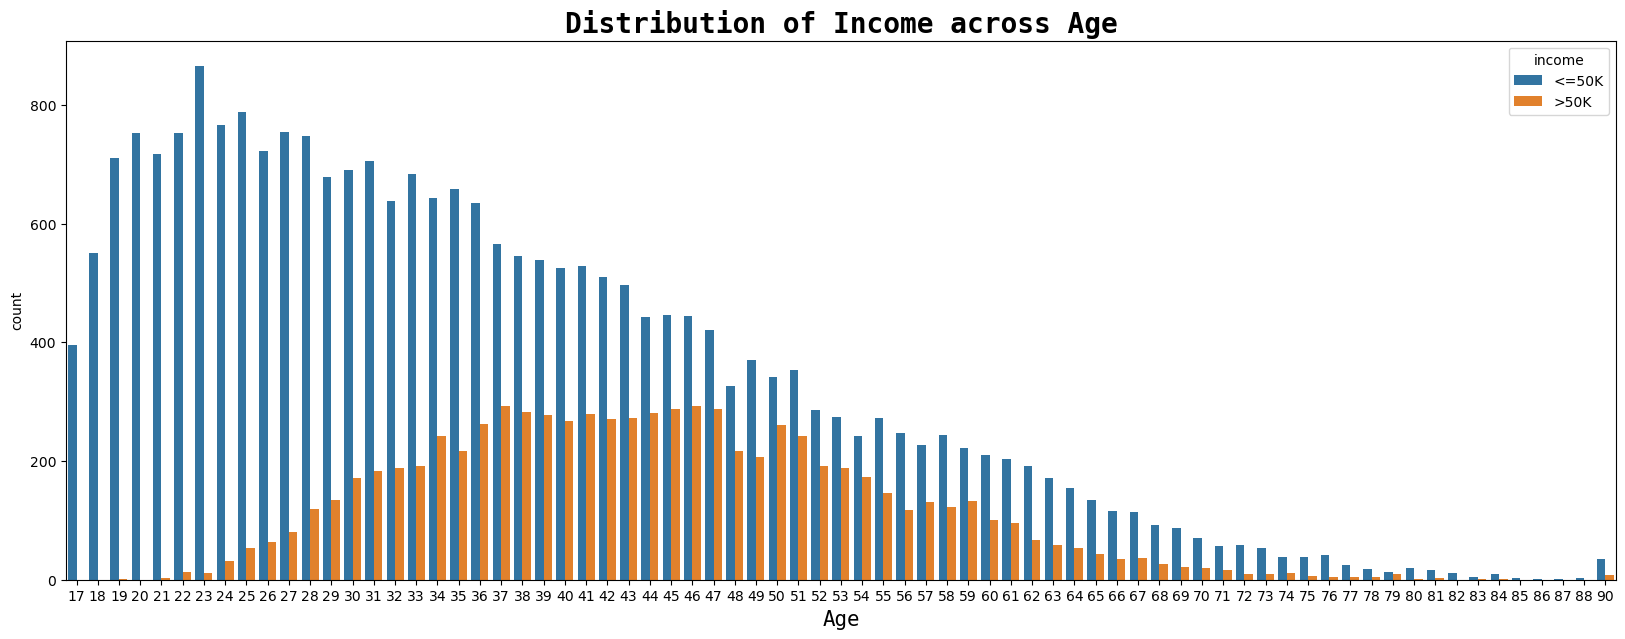

In [22]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x='age', hue='income', data=df)
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

# Observation:-
The count plot makes it possible to compare the income distribution among various age groups visually, which makes it easier to spot patterns or trends in the data. We discovered that while there was no increase in pay between the ages of 17 and 24, after they gained experience, an average increment above $50,000 was observed. We have thus shown that as we become older and gain more experience, our pay also tends to rise.

# step 2.2: Separating Numeric and categorical Data

In [23]:
df_num=df.select_dtypes(['int','float'])
df_num

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [24]:
df_cat=df.select_dtypes(['object'])
df_cat

,workclass,education,marital.status,occupation,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Female,United-States,<=50K
...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Female,United-States,<=50K


# step 2.3: Using Label Encoder for converting category data into numeric

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,workclass,education,marital.status,occupation,sex,native.country,income
0,3,11,6,9,0,38,0
1,3,11,6,3,0,38,0
2,3,15,6,9,0,38,0
3,3,5,0,6,0,38,0
4,3,15,5,9,0,38,0
...,...,...,...,...,...,...,...
32556,3,15,4,10,1,38,0
32557,3,7,2,12,0,38,0
32558,3,11,2,6,1,38,1
32559,3,11,6,0,0,38,0


In [28]:
df_cat

,workclass,education,marital.status,occupation,sex,native.country,income
0,3,11,6,9,0,38,0
1,3,11,6,3,0,38,0
2,3,15,6,9,0,38,0
3,3,5,0,6,0,38,0
4,3,15,5,9,0,38,0
...,...,...,...,...,...,...,...
32556,3,15,4,10,1,38,0
32557,3,7,2,12,0,38,0
32558,3,11,2,6,1,38,1
32559,3,11,6,0,0,38,0


# Step 2.4: Features Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[ 3.76961234, -1.06799736, -0.42005962, -0.14592048, 10.59350656,
        -0.03542945],
       [ 3.18311167, -0.53916866, -0.42005962, -0.14592048, 10.59350656,
        -1.81720429],
       [ 2.01011032, -0.03521956, -0.03136003, -0.14592048, 10.59350656,
        -0.03542945],
       ...,
       [ 0.10398314, -0.33543266, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476]])

In [32]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

            age    fnlwgt  education.num  capital.gain  capital.loss  \
0      3.769612 -1.067997      -0.420060      -0.14592     10.593507   
1      3.183112 -0.539169      -0.420060      -0.14592     10.593507   
2      2.010110 -0.035220      -0.031360      -0.14592     10.593507   
3      1.130359 -0.468215      -2.363558      -0.14592      9.461864   
4      0.177296  0.709482      -0.031360      -0.14592      9.461864   
...         ...       ...            ...           ...           ...   
32556 -1.215643  1.140460      -0.031360      -0.14592     -0.216660   
32557 -0.849080  0.639741       0.746039      -0.14592     -0.216660   
32558  0.103983 -0.335433      -0.420060      -0.14592     -0.216660   
32559  1.423610 -0.358777      -0.420060      -0.14592     -0.216660   
32560 -1.215643  0.110960      -0.420060      -0.14592     -0.216660   

       hours.per.week  
0           -0.035429  
1           -1.817204  
2           -0.035429  
3           -0.035429  
4           -0.

# step 2.5: Concatenate Numerical and Categorical Columns

In [33]:
df_new=pd.concat([df_scaled,df_cat],axis=1)
df_new

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,sex,native.country,income
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,0,38,0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,0,38,0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,0,38,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,0,38,0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,38,0
32557,-0.849080,0.639741,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,0,38,0
32558,0.103983,-0.335433,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,1,38,1
32559,1.423610,-0.358777,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,0,38,0


# step 2.6:Splitting Data into X and Y

In [34]:
y=df_new.iloc[:,12:13]
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [35]:
x=df_new.drop('income',axis=1)
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,sex,native.country
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,0,38
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,0,38
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,0,38
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,0,38
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,38
32557,-0.849080,0.639741,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,0,38
32558,0.103983,-0.335433,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,1,38
32559,1.423610,-0.358777,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,0,38


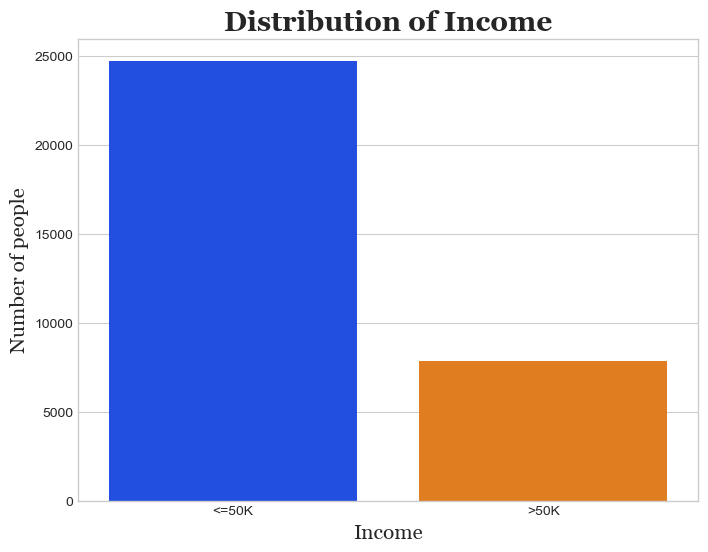

In [36]:
income = df['income'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [37]:
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

# Observation:
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# *Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [38]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [39]:
x=x_ros
y=y_ros

In [40]:
income_after_oversampling = y.value_counts(normalize=True)
round(income_after_oversampling* 100,2).astype('str') + ' %'

income
0         50.0 %
1         50.0 %
dtype: object

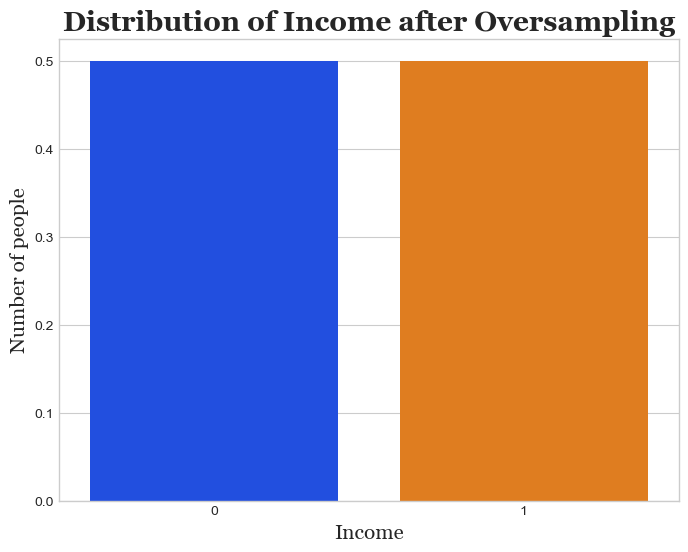

In [41]:
income_after_oversampling = y.value_counts(normalize=True).reset_index()
income_after_oversampling.columns = ['income','number']
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x='income', y='number', data=income_after_oversampling, palette='bright')
plt.title('Distribution of Income after Oversampling', fontdict={'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# Observations:- This code calculates and prints the percentage distribution of the 'income' column after oversampling. If the percentages are now more balanced compared to before oversampling, it indicates that the oversampling process has helped address the imbalance- issue in your dataset. where 0 indicates as salary <=50k and 1 indicates as salary >50k

# step 3: Model Evaluation

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under Classification problem, as the prediction of a person's income is above 50k or below 50k. The supervised machine learning models (Classification) considered to train the dataset in this notebook are:

Logistic Regression

k-Nearest Neighbors Regression

Decision Tree

Random Forest

SVM

XG boost


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC()
xgb = XGBClassifier()

In [45]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [46]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7393
           1       0.77      0.77      0.77      7439

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



LogisticRegression()

In [47]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7393
           1       0.79      0.89      0.84      7439

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832



KNeighborsClassifier()

In [48]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7393
           1       0.87      0.96      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



DecisionTreeClassifier()

In [49]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7393
           1       0.89      0.97      0.93      7439

    accuracy                           0.92     14832
   macro avg       0.93      0.92      0.92     14832
weighted avg       0.93      0.92      0.92     14832



RandomForestClassifier(random_state=42)

In [50]:
#mymodel(svm)

In [51]:
mymodel(xgb)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      7393
           1       0.84      0.91      0.87      7439

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Step 4: Hyperparameter Tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

## 4.1.1: GridSearchCV For Logistic Regression

In [53]:
parameters={'solver':['poly','liblinear','lbfgs','saga','sag','newton-cg'],'penalty':['none','l1','l2','elasticnet'],'C':[100,10,1,0.1,0.01]}
gs=GridSearchCV(logreg,parameters,verbose=4)

In [54]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ...C=100, penalty=none, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=100, penalty=none, solv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['poly', 'liblinear', 'lbfgs', 'saga', 'sag',
                                    'newton-cg']},
             verbose=4)

# 4.1.2 Getting best HyperParameters :

In [55]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

# 4.1.3 Getting best accuracy for Logistic Regression as per Hyper tuned best Parameters

In [56]:

logreg=LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
                          
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7393
           1       0.77      0.77      0.77      7439

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



# 4.2: GridSearchCV For Decision Tree

In [57]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gs=GridSearchCV(dt,parameters,verbose=4)

In [58]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

# 4.2.1 Getting best HyperParameters :

In [59]:
gs.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

# 4.2.2 Getting best accuracy for DecisionTree Classifier as per Hyper tuned best Parameters

In [60]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=2)
                          
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7393
           1       0.86      0.96      0.91      7439

    accuracy                           0.90     14832
   macro avg       0.91      0.90      0.90     14832
weighted avg       0.91      0.90      0.90     14832



# 4.3: GridSearchCV For KNN

In [61]:
parameters={'n_neighbors':list(range(3, 31,2)), 'weights': ['uniform', 'distance']}
gs=GridSearchCV(knn,parameters,verbose=4)

In [62]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.833 total time=   2.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.840 total time=   2.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.839 total time=   2.4s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.834 total time=   2.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.826 total time=   2.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.867 total time=   2.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.874 total time=   2.1s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=   2.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.874 total time=   2.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.861 total time=   2.1s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.818 total time=   2.7s
[CV 2/5] END ....n_neighbors=5, weights=uniform

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'weights': ['uniform', 'distance']},
             verbose=4)

# 4.3.1 Getting best HyperParameters :

In [63]:
gs.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

# 4.2.2 Getting best accuracy for KNeighbors Classifier as per Hyper tuned best Parameters

In [64]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
                          
knn.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7393
           1       0.86      0.96      0.91      7439

    accuracy                           0.90     14832
   macro avg       0.91      0.90      0.90     14832
weighted avg       0.91      0.90      0.90     14832



# Conclusion:
In this project, we build various models like logistic regression, knn classifier,decision tree classifier,random forest classifier,XG Boost and Hyper Tuning Parameter Using GridSerachCV for logistic regression,decision tree classifier & KNN.

A Random Forest Classifier gives the highest accuracy score of 92.00 percent among all the Hypertuned- ML Models. 

Thus, for the Adult Census Income Prediction Dataset, the best accuracy can be achieved using Random Forest Model.